# Naïve Bayes Classification in Python

## Paso 1: Importar bibliotecas <br>
Necesitamos Pandas para la manipulación de datos, NumPy para los cálculos matemáticos, MatplotLib y Seaborn para las visualizaciones. Las bibliotecas Sklearn se utilizan para las operaciones de aprendizaje automático.

In [1]:
#Importar librerias
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import warnings
warnings.filterwarnings("ignore")

from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score

## Paso 2: Importar datos

In [ ]:
# Lectura dataset
df_net = pd.read_csv('./Data/Social_Network_Ads.csv')
df_net.head(7)

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
5,15728773,Male,27,58000,0
6,15598044,Female,27,84000,0


## Paso 3: Análisis de datos/Preprocesamiento
El análisis exploratorio de datos (EDA) es un proceso de análisis y resumen de las características principales de un conjunto de datos, con el objetivo de obtener información sobre la estructura, las relaciones y los patrones subyacentes dentro de los datos. El EDA ayuda a identificar características, anomalías y tendencias importantes en los datos que pueden servir de base para futuros análisis y modelos.

La EDA generalmente implica varios pasos clave, entre ellos:

- La limpieza y preparación de datos implica eliminar valores faltantes o incorrectos, transformar variables y manejar valores atípicos.
- La visualización de datos es el proceso de crear gráficos, cuadros y otras representaciones visuales de los datos para ayudar a identificar patrones, relaciones y anomalías.
- El análisis estadístico implica la aplicación de métodos matemáticos y estadísticos a los datos para identificar características y relaciones importantes.
<br>

El preprocesamiento tiene como objetivo preparar los datos de una manera que permita un análisis y modelado efectivos y eliminar cualquier sesgo o error que pueda afectar los resultados.

In [3]:
# Eliminar la columna User ID
df_net = df_net.drop(columns=['User ID'])

In [4]:
# Muestra la estructura, incluyendo tipos de datos y conteo de valores no nulos.
print(df_net.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Gender           400 non-null    object
 1   Age              400 non-null    int64 
 2   EstimatedSalary  400 non-null    int64 
 3   Purchased        400 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 12.6+ KB
None


In [5]:
# Describe los datos
print(df_net.describe())

              Age  EstimatedSalary   Purchased
count  400.000000       400.000000  400.000000
mean    37.655000     69742.500000    0.357500
std     10.482877     34096.960282    0.479864
min     18.000000     15000.000000    0.000000
25%     29.750000     43000.000000    0.000000
50%     37.000000     70000.000000    0.000000
75%     46.000000     88000.000000    1.000000
max     60.000000    150000.000000    1.000000


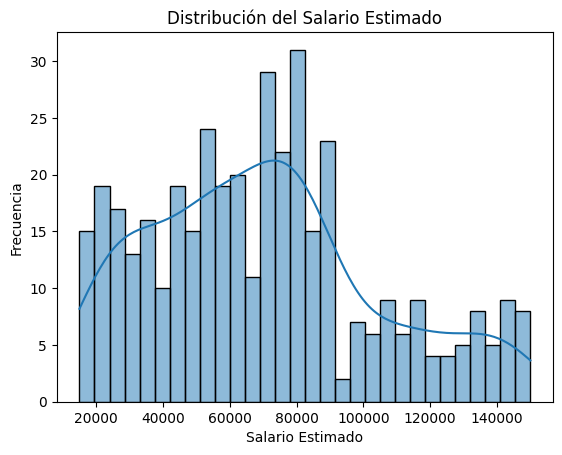

In [6]:
# Distribución salarial
sns.histplot(df_net['EstimatedSalary'], bins=30, kde=True)
plt.title('Distribución del Salario Estimado')
plt.xlabel('Salario Estimado')
plt.ylabel('Frecuencia')
plt.show()

### Codificación de etiquetas

La codificación de etiquetas es una técnica de preprocesamiento en el aprendizaje automático y el análisis de datos donde los datos categóricos se convierten en valores numéricos para hacerlos compatibles con operaciones y modelos matemáticos.

A los datos categóricos se les asigna un valor entero, generalmente comenzando desde 0, y a cada categoría única de los datos se le asigna un valor entero único para que los datos categóricos puedan tratarse como datos numéricos.

In [7]:
# Convertir la columna Gender en numérica (0 para Female, 1 para Male)
labelencoder = LabelEncoder()
df_net['Gender'] = labelencoder.fit_transform(df_net['Gender'])

In [8]:
# Verificar los datos después de la transformación
print(df_net.head(7))

   Gender  Age  EstimatedSalary  Purchased
0       1   19            19000          0
1       1   35            20000          0
2       0   26            43000          0
3       0   27            57000          0
4       1   19            76000          0
5       1   27            58000          0
6       0   27            84000          0


### Matriz de correlación

Una matriz de correlación es una tabla que resume la relación entre múltiples variables en un conjunto de datos. Muestra los coeficientes de correlación entre cada par de variables, que indican la fuerza y ​​la dirección de la relación entre las variables. Es útil para identificar variables altamente correlacionadas y seleccionar un subconjunto de variables para un análisis posterior.

El coeficiente de correlación puede oscilar entre -1 y 1, donde:

Un coeficiente de correlación de -1 indica una fuerte relación negativa entre dos variables.
Un coeficiente de correlación de 0 indica que no hay relación entre dos variables.
Un coeficiente de correlación de 1 indica una fuerte relación positiva entre dos variables.

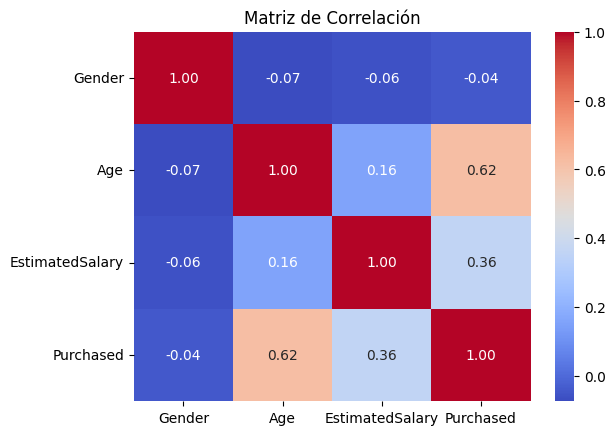

In [9]:
# Visualizamos la matriz de correlación para entender las relaciones entre las variables
correlation_matrix = df_net.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de Correlación')
plt.show()

## Paso 4: Dividir datos
La división de datos en variables independientes y dependientes implica separar las características de entrada ( variables independientes ) de la variable de destino ( variable dependiente ) . Las variables independientes se utilizan para predecir el valor de la variable dependiente.

Luego, los datos se dividen en un conjunto de entrenamiento y un conjunto de prueba; el conjunto de entrenamiento se utiliza para ajustar el modelo y el conjunto de prueba se utiliza para evaluar su rendimiento.

### Variables independientes/dependientes

En nuestros datos Edad, SalarioEstimado es la variable independiente asignada como X y Comprado es la variable dependiente y .

In [10]:
# Seleccionamos las variables independientes (X) y la variable dependiente (y)
X = df_net[['Age', 'EstimatedSalary']]
y = df_net['Purchased']

### División de tren/prueba

Los datos generalmente se dividen en dos partes: la mayoría de los datos se utilizan para entrenar el modelo y una porción más pequeña se utiliza para realizar pruebas.

El conjunto de entrenamiento se utiliza para entrenar el modelo y encontrar los parámetros óptimos. Luego, el modelo se prueba en el conjunto de prueba para evaluar su rendimiento y determinar su precisión. Esto es importante porque si el modelo se entrena y se prueba con los mismos datos, puede sobreajustarse a los datos y tener un rendimiento deficiente con datos nuevos e inéditos.

Hemos dividido los datos en un 75% para entrenamiento y un 25% para pruebas.

In [11]:
# Dividimos los datos en conjuntos de entrenamiento y prueba (75% entrenamiento, 25% prueba)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

## Paso 5: Escalado de características
El escalamiento de características es un método para transformar los valores de las variables numéricas para que tengan una escala común, ya que los algoritmos de aprendizaje automático son sensibles a la escala de las características de entrada.

Hay dos métodos comunes de escalamiento de características: normalización y estandarización .

- La normalización escala los valores de las variables para que estén entre 0 y 1. Esto se hace restando el valor mínimo de la característica y dividiéndolo por el rango (máximo-mínimo).
- La estandarización transforma los valores de las variables para que tengan una media de 0 y una desviación estándar de 1. Esto se hace restando la media y dividiéndola por la desviación estándar.


El escalamiento de características generalmente se realiza antes de entrenar un modelo, ya que puede mejorar el rendimiento del modelo y reducir el tiempo necesario para entrenarlo, y ayuda a garantizar que el algoritmo no esté sesgado hacia variables con valores más grandes.

In [12]:
# Estandarizamos las características para mejorar el rendimiento del modelo
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## Paso 6: Entrenar el modelo
El entrenamiento de un modelo de aprendizaje automático implica el uso de un conjunto de datos de entrenamiento para estimar los parámetros del modelo. El proceso de entrenamiento utiliza un algoritmo de aprendizaje que actualiza iterativamente los parámetros del modelo, minimiza una función de pérdida que mide la diferencia entre los valores previstos y los valores reales en los datos de entrenamiento y actualiza los parámetros del modelo para mejorar la precisión del modelo.

Es importante tener en cuenta que el algoritmo SVM requiere escalamiento de características y una elección adecuada de funciones de kernel y parámetros de regularización para producir predicciones precisas.

Pase los datos X_train e y_train al modelo clasificador Naïve Bayes mediante **classifier.fit** para entrenar el modelo con nuestros datos de entrenamiento.

In [13]:
# Creamos el clasificador Naïve Bayes
classifier = GaussianNB()

# Entrenamos el modelo con nuestros datos de entrenamiento
classifier.fit(X_train, y_train)

GaussianNB()

## Paso 7: Predecir el resultado/puntuar el modelo
Una vez calculada la probabilidad de las características de cada clase, el algoritmo multiplica la probabilidad por la probabilidad previa de cada clase, que se calcula a partir de los datos de entrenamiento. La clase con la probabilidad más alta se selecciona como la clase predicha.

La precisión del modelo se puede evaluar en un conjunto de prueba, que previamente se mantuvo fuera del proceso de entrenamiento.

In [14]:
# Hacemos predicciones sobre el conjunto de prueba
y_pred = classifier.predict(X_test)

print('Prediction :\n',y_pred)

Prediction :
 [1 1 0 1 0 0 1 0 0 0 0 1 0 0 0 0 1 1 0 1 0 0 1 1 0 1 0 0 1 0 0 0 1 0 1 0 0
 0 0 0 1 0 0 1 0 1 0 0 1 0 0 1 0 0 0 0 1 0 0 0 0 0 1 0 0 1 0 1 0 0 1 0 0 0
 1 0 1 1 0 0 0 0 1 0 1 1 0 1 0 0 1 0 0 0 0 0 1 0 1 0]


## Paso 8: Evaluar el modelo
La precisión es una métrica útil para evaluar el rendimiento de un modelo, pero puede ser engañosa en algunos casos. Por ejemplo, en un conjunto de datos altamente desequilibrado, un modelo que siempre predice la clase mayoritaria tendrá una alta precisión, aunque no tenga un buen rendimiento. Por lo tanto, es importante considerar otras métricas, como la matriz de confusión, la precisión, la recuperación, la puntuación F1 y el ROC-AUC, junto con la precisión, para obtener una imagen más completa del rendimiento de un modelo.

### Exactitud

La precisión es una métrica que se utiliza habitualmente para evaluar el rendimiento de un modelo de aprendizaje automático. Mide la proporción de predicciones correctas realizadas por el modelo en un conjunto de datos determinado.

En un problema de clasificación binaria, la precisión se define como la cantidad de predicciones correctas dividida por la cantidad total de predicciones. En un problema de clasificación de múltiples clases, la precisión es el promedio de las puntuaciones de precisión de cada clase.

In [15]:
# Calculamos la precisión del modelo
accuracy = accuracy_score(y_test, y_pred)
print(f'Precisión del modelo: {accuracy:.2f}')

Precisión del modelo: 0.93


### Informe de clasificación

Un informe de clasificación es un resumen del rendimiento de un modelo de clasificación. Proporciona varias métricas para evaluar el rendimiento del modelo en una tarea de clasificación, incluidas la precisión, la recuperación, la puntuación f1 y el soporte.

El informe de clasificación también proporciona un promedio ponderado de los puntajes de cada clase, que tiene en cuenta el desequilibrio en la distribución de las clases en el conjunto de datos.

In [16]:
# Generamos un informe de clasificación
report = classification_report(y_test, y_pred)
print('Informe de Clasificación:')
print(report)

Informe de Clasificación:
              precision    recall  f1-score   support

           0       0.92      0.97      0.95        63
           1       0.94      0.86      0.90        37

    accuracy                           0.93       100
   macro avg       0.93      0.92      0.92       100
weighted avg       0.93      0.93      0.93       100



### Puntuación de F1

La puntuación F1 es la media armónica de precisión y recuperación. Proporciona una puntuación única que equilibra la precisión y la recuperación. El soporte es la cantidad de instancias de cada clase en el conjunto de datos de evaluación.

In [17]:
# Calculamos la puntuación F1
f1 = f1_score(y_test, y_pred)
print(f'Puntuación F1: {f1:.2f}')

Puntuación F1: 0.90


### Matriz de confusión

Se utiliza una matriz de confusión para evaluar el rendimiento de un modelo de clasificación. Resume el rendimiento del modelo comparando las etiquetas de clase reales de los datos con las etiquetas de clase previstas generadas por el modelo.

- Verdaderos positivos (VP): casos positivos predichos correctamente.
- Falsos positivos (FP): casos positivos predichos incorrectamente.
- Verdaderos negativos (VN): casos negativos predichos correctamente.
- Falsos negativos (FN): casos negativos predichos incorrectamente.

Proporciona una comprensión clara y detallada de qué tan bien está funcionando el modelo y ayuda a identificar áreas de mejora.

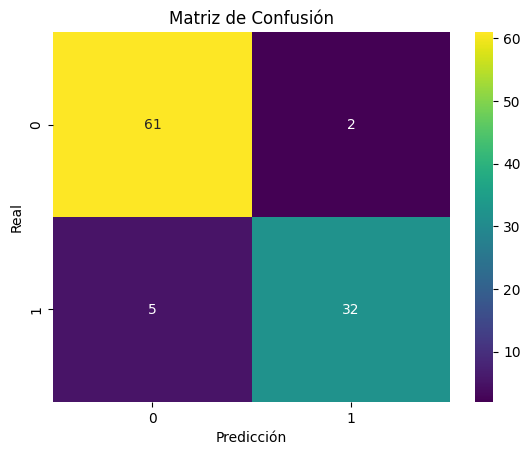

In [18]:
# Generamos una matriz de confusión
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='viridis', cbar=True)
plt.title('Matriz de Confusión')
plt.xlabel('Predicción')
plt.ylabel('Real')
plt.show()

### Curva de precisión-recuperación

Una curva de precisión-recuperación es un gráfico que resume el rendimiento de un modelo de clasificación binaria como un equilibrio entre precisión y recuperación, y es útil para evaluar la capacidad del modelo de hacer predicciones positivas precisas mientras encuentra la mayor cantidad posible de instancias positivas. La precisión y la recuperación son dos métricas comunes para evaluar el rendimiento de un modelo de clasificación.

**La precisión** es el número de predicciones positivas verdaderas dividido por la suma de las predicciones positivas verdaderas y las predicciones positivas falsas . Mide la precisión de las predicciones positivas realizadas por el modelo.

**La recuperación** es el número de predicciones positivas verdaderas dividido por la suma de las predicciones positivas verdaderas y las predicciones negativas falsas . Mide la capacidad del modelo para encontrar todas las instancias positivas.

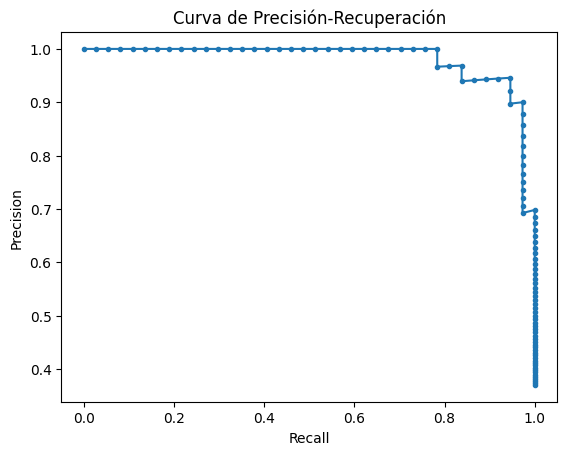

In [19]:
# Curva de precisión-recuperación
precision, recall, _ = precision_recall_curve(y_test, classifier.predict_proba(X_test)[:, 1])
plt.plot(recall, precision, marker='.')
plt.title('Curva de Precisión-Recuperación')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.show()

### Curva AUC/ROC

La curva característica operativa del receptor (ROC) y el área bajo la curva (AUC) son métricas comúnmente utilizadas para evaluar el rendimiento de un modelo de clasificación binaria.

Una **curva ROC** representa gráficamente la tasa de verdaderos positivos (TPR) frente a la tasa de falsos positivos (FPR) para diferentes umbrales de las probabilidades de predicción del modelo. La TPR es la cantidad de predicciones de verdaderos positivos dividida por la cantidad de casos positivos reales , mientras que la FPR es la cantidad de predicciones de falsos positivos dividida por la cantidad de casos negativos reales .

El **AUC** es el área bajo la curva ROC y proporciona una métrica de un solo número que resume el rendimiento del modelo en todo el rango de umbrales posibles.

Un AUC alto indica que el modelo es capaz de distinguir bien las instancias positivas de las negativas.

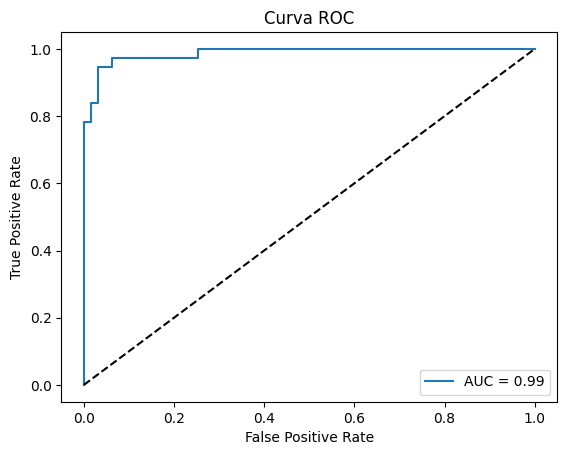

In [20]:
# Curva AUC/ROC
fpr, tpr, _ = metrics.roc_curve(y_test, classifier.predict_proba(X_test)[:, 1])
roc_auc = metrics.auc(fpr, tpr)
plt.plot(fpr, tpr, label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], 'k--')
plt.title('Curva ROC')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='best')
plt.show()

### Simulación
Veamos con un ejemplo de una Edad de 45 y un Salario de 97000 y verifiquemos si es probable que el usuario compre el seguro o no.

In [21]:
# Vamos a predecir si un usuario de 45 años y un salario de 97000 comprará el producto
sample_data = scaler.transform([[45, 97000]])
prediction = classifier.predict(sample_data) # Normalizamos los datos del nuevo usuario usando el mismo escalador que el conjunto de entrenamiento
print(f'Predicción para Edad=45 y Salario=97000: {prediction[0]}')

Predicción para Edad=45 y Salario=97000: 1


## Conclusión
Naive Bayes es un algoritmo rápido y simple que se usa ampliamente para la clasificación de texto, el filtrado de spam y el análisis de sentimientos. También es fácil de implementar y puede manejar datos faltantes. Sin embargo, su principal limitación es el supuesto de independencia entre las características, que puede no ser válido para todos los conjuntos de datos.

En conclusión, Naive Bayes es un algoritmo de clasificación potente y ampliamente utilizado, que es fácil de entender e implementar. Es especialmente útil para problemas con conjuntos de datos pequeños y resultados rápidos, como la clasificación de texto y el filtrado de spam. Su rápido tiempo de cálculo y su buena precisión lo convierten en una herramienta valiosa en el campo de la ciencia de datos.